# PHYS 139 Final Project

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import random as random

%matplotlib inline

## Part 2A

We have no guess as to where our changepoint is, therefore we will assign it a uniform prior,

$$P(n_0)= \frac{1}{N}.$$

We will assume that the number of mine accidents each year, $x_n$ are modeled by the Poisson distribution,

$$P(x|\lambda) = \frac{\left(\lambda\tau\right)^x}{x!}\exp{\left(-\lambda\tau\right)}.$$

or, for $\tau=1,$

$$P(x|\lambda) = \frac{\lambda^x}{x!}\exp{-\lambda}.$$


We assume that the observations have been genrated by two different Poisson distributions; $P\left(x|\lambda_1\right)$ before the change point, and $P\left(x|\lambda_2\right)$ after. The only information we have on $\lambda_1$ and $\lambda_2$ is that they are distribted according to a prior gamma distribution,

$$P\left(\lambda\right) = Gamma\left(\lambda|a,b\right) = \frac{1}{\Gamma\left(a\right)}b^a\lambda^{a-1}\exp\left(-b\lambda\right).$$

The join gamma distribution is,

$$P\left(x_{1:N}|\lambda_1, \lambda_2, n_0\right) = \prod_{n=1}^{n_0}P(x_n|\lambda_1)\prod_{n=n_0+1}^NP(x_n|\lambda_2).$$

Bayes tells us,

$$P(n_0, \lambda_1,\lambda_2|x_{1:N}) \propto P\left(x_{1:N}|\lambda_1, \lambda_2, n_0\right)P(\lambda_1)P(\lambda_2)P(n_0)$$

or,

$$P(n_0, \lambda_1,\lambda_2|x_{1:N}) \propto \prod_{n=1}^{n_0}P(x_n|\lambda_1)\prod_{n=n_0+1}^NP(x_n|\lambda_2)P(\lambda_1)P(\lambda_2)P(n_0).$$

Pluggin in each distribution we get,

$$P(n_0, \lambda_1,\lambda_2|x_{1:N}) \propto \prod_{n=1}^{n_0}\frac{\lambda_1^{x_n}}{x_n!}\exp(-\lambda_1)\prod_{n=n_0+1}^N\frac{\lambda_2^{x_n}}{x_n!}\exp(-\lambda_2)\frac{1}{\Gamma(a)}b^a\lambda_1^{a-1}\exp(-b\lambda_1)\frac{1}{\Gamma(a)}b^a\lambda_2^{a-1}\exp(-b\lambda_2)\frac{1}{N}$$

$$=\prod_{n=1}^{N}\left(\frac{1}{x_n!}\right)\lambda_1^{\sum_{n=1}^{n_0}x_n}\exp(-n_0\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n}\exp(-(N-n_0)\lambda_2)\frac{1}{\Gamma(a)}b^a\lambda_1^{a-1}\exp(-b\lambda_1)\frac{1}{\Gamma(a)}b^a\lambda_2^{a-1}\exp(-b\lambda_2)\frac{1}{N}$$

$$=\prod_{n=1}^{N}\left(\frac{1}{x_n!}\right)\lambda_1^{\sum_{n=1}^{n_0}x_n+a-1}\exp(-(n_0+b)\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n+a-1}\exp(-(N-n_0+b)\lambda_2)\frac{1}{\Gamma(a)}b^a\frac{1}{\Gamma(a)}b^a\frac{1}{N}$$

$$=\frac{1}{N}\frac{1}{\Gamma^2(a)}b^{2a}\prod_{n=1}^{N}\left(\frac{1}{x_n!}\right)\lambda_1^{\sum_{n=1}^{n_0}x_n+a-1}\exp(-(n_0+b)\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n+a-1}\exp(-(N-n_0+b)\lambda_2)$$

$$=C\lambda_1^{\sum_{n=1}^{n_0}x_n+a-1}\exp(-(n_0+b)\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n+a-1}\exp(-(N-n_0+b)\lambda_2)$$

where $C = \frac{1}{N}\frac{1}{\Gamma^2(a)}b^{2a}\prod_{n=1}^{N}\left(\frac{1}{x_n!}\right)$ is just a normalizatin constant.

Thus,

$$P(n_0, \lambda_1,\lambda_2|x_{1:N}) \propto \lambda_1^{\sum_{n=1}^{n_0}x_n+a-1}\exp(-(n_0+b)\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n+a-1}\exp(-(N-n_0+b)\lambda_2).$$

We define the following quantities,

$$a_1 = a + \sum_{n=1}^{n_0}x_n$$
$$b_1 = b+n_0$$
$$a_2 = a + \sum_{n=n_0+1}^{N}x_n$$
$$b_2 = b + N-n_0.$$

We can rewrite the joint probability as,

$$P(n_0, \lambda_1,\lambda_2|x_{1:N}) \propto \lambda_1^{a_1-1}\exp(-b_1\lambda_1)\lambda_2^{a_2-1}\exp(-b_2\lambda_2).$$

From this result we can see that $\lambda_1\sim Gamma(a_1, b_1)$ and $\lambda_2\sim Gamma(a_2, b_2).$

Furthermore,

$$\log{\left(P(n_0, \lambda_1,\lambda_2|x_{1:N})\right)} \propto\log{(\lambda_1^{a_1-1}\exp(-b_1\lambda_1)\lambda_2^{a_2-1}\exp(-b_2\lambda_2))}$$

$$= \log{(\lambda_1^{a_1-1})}+\log{(\exp(-b_1\lambda_1))}+\log{(\lambda_2^{a_2-1})}+\log{(\exp(-b_2\lambda_2))}$$

Thus,

$$\log{\left(P(n_0, \lambda_1,\lambda_2|x_{1:N})\right)} \propto(a_1-1)\lambda_1-b_1\lambda_1+(a_2-1)\lambda_2-b_2\lambda_2$$

Notes:
Use bayes theorem and integrate out unneccessary things

## Mine Accident Data

In [46]:
data = pd.read_csv('mine_data.csv')

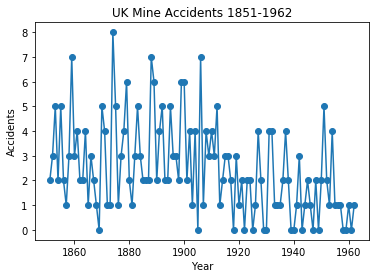

In [47]:
plt.plot('year', 'accidents', '-o', data=data)
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.title('UK Mine Accidents 1851-1962')
plt.show()

In [48]:
def our_func(lam, a, b):
    return lam**(a - 1) * np.exp(-b * lam)

def mcmc(steps, data):
    # Constants and Initial Positions
    a1 = a2 = b1 = b2 = 3
    n_0 = 61
    track_lambda_1 = []
    track_lambda_2 = []
    track_n_0 = []
    
    years = data.year.values
    accidents = data.accidents.values

    for step in range(steps):
        # Before Change at n_0
        lambda_1 = np.random.gamma(a1 + np.sum(accidents[:n_0]), 1./(n_0 + b1))
        
        # After Change at n_0
        lambda_2 = np.random.gamma(a2 + np.sum(accidents[n_0:]), 1./(len(years) - n_0 + b2))
        
        # Get the probability for each n based on lambda_1 and lambda_2
        p_of_n_0 = [np.exp(np.log(lambda_1) * np.sum(accidents[:y]) - lambda_1 * y 
                  + np.log(lambda_2) * np.sum(accidents[y:]) - lambda_2 * (len(years) - y))
                    for y in range(1, len(years))]

        probs = p_of_n_0/np.sum(p_of_n_0)  # Normlaize probabilities
        n_0 = random.choices(list(range(len(years)))[:-1], weights=probs)[0]

        # Add values to our trackers
        track_lambda_1.append(lambda_1)
        track_lambda_2.append(lambda_2)
        track_n_0.append(n_0)
        
    return track_lambda_1, track_lambda_2, track_n_0

In [49]:
l1, l2, change_year = mcmc(10000, data)

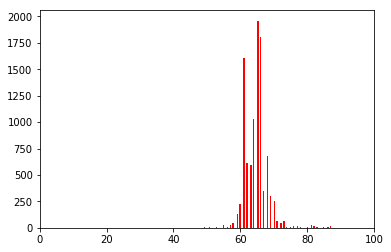

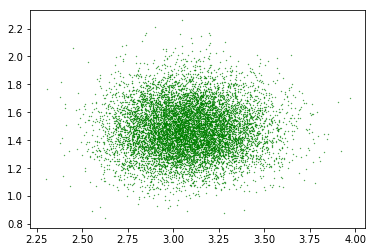

In [50]:
plt.hist(change_year, 100, color='red', label='$n_0$')
plt.xlim(0, 100)
plt.show()
plt.scatter(l1, l2, color='green', s=0.1)
plt.show()